In [1]:
import torch
import torch.nn as nn

import torch.nn.functional as F
import torch.optim as optim

import matplotlib.pyplot as plt
import torchvision
from torchvision import datasets
from torchvision.transforms import transforms

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


# DDPM

In [3]:
# Hyperparams
BATCH_SIZE = 128  # according to the paper

In [4]:
# CIFAR10
# transform = transforms.Compose([
#     transforms.ToTensor(),
#     transforms.Normalize((0.5,), (0.5,)),
#     transforms.RandomHorizontalFlip()  # p=0.5 by default
# ])

# train = datasets.CIFAR10("../data", train=True, download=True, transform=transform)
# test = datasets.CIFAR10("../data", train=False, download=True, transform=transform)

# train_loader = torch.utils.data.DataLoader(train, batch_size=BATCH_SIZE, shuffle=True)
# test_loader = torch.utils.data.DataLoader(test, batch_size=BATCH_SIZE, shuffle=False)

In [5]:
# MNIST
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train = datasets.MNIST("../data", train=True, download=True, transform=transform) # 28x28 resolution
test = datasets.MNIST("../data", train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train, batch_size=BATCH_SIZE, shuffle=True)
test_loader = torch.utils.data.DataLoader(test, batch_size=BATCH_SIZE, shuffle=False)

Testing UNET

2.0.1+cu118
3.7.5
cuda:0
Files already downloaded and verified
Files already downloaded and verified


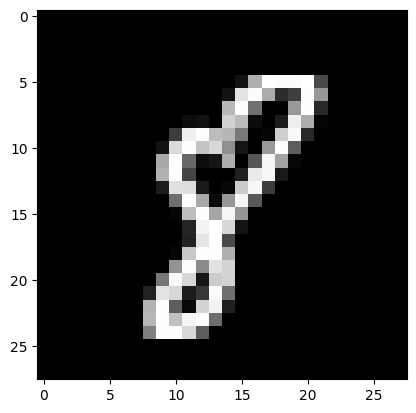

In [6]:
from ddpm import Unet
model = Unet(1)
dataiter = iter(train_loader)
image,label = next(dataiter)
#plt.imshow(image[0].squeeze().numpy(),cmap='gray')
plt.imshow(image[0][0].numpy(),cmap='gray')
plt.show()

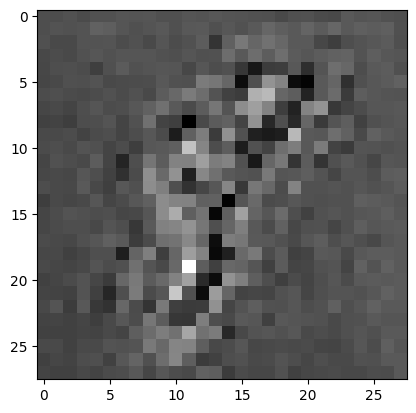

In [7]:
output = model(image[0].unsqueeze(0), t=torch.tensor([1]))
plt.imshow(output.squeeze().squeeze().detach().numpy() ,cmap='gray')
plt.show()

# VAE

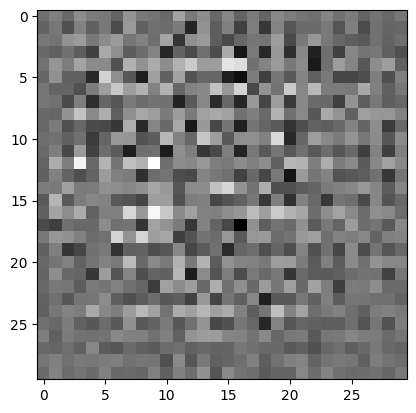

In [11]:
import torch
import vae
from vae import VAE 
# Synthetic forward-pass test (no dataset)
batch = 3
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = VAE(1,64).to(device)

output = model(image[0].unsqueeze(0).to(device))
plt.imshow(output.squeeze().squeeze().detach().cpu().numpy(),cmap='gray')
plt.show()


# LDM